In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data = pd.read_csv('output.csv', header=None)

In [9]:
map = np.zeros([201, 201]) # 10m x 10m with resolution 10/100

In [25]:
for row in data.iterrows():
    x = row[1][0]
    y = row[1][1]
    ix = int(x / 0.1 + 100)
    iy = int(100 - y / 0.1)
    map[iy-3:iy+3][ix-3:ix+3] = 1
map[99:101, 99:101] = 1

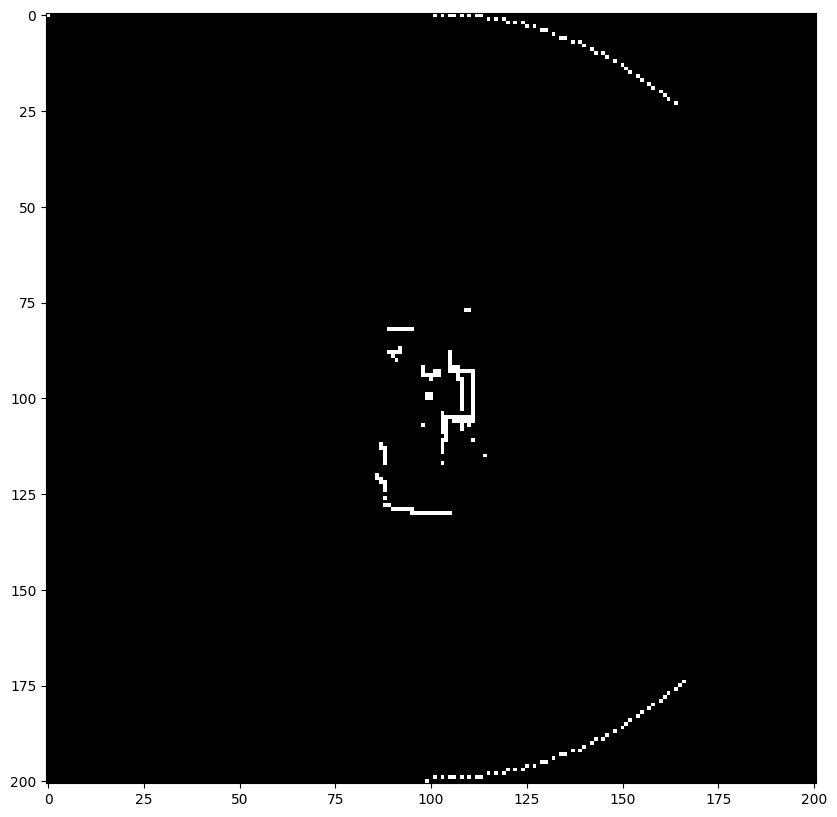

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(map, cmap='gray')

In [17]:
import cv2 
def generate_inflation_map(img):
    curr_map = (img > 0).astype(np.uint8)
    curr_map = 1 - np.clip(curr_map, 0, 1)

    curr_map = cv2.distanceTransform(curr_map, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)

    new_curr = -1.0 * cost_scaling_factor * (curr_map * 10/128 - inscribed_radius)
    costs = np.power(np.e, new_curr) * 253
    costs = np.clip(costs, 0, 255).astype(np.uint8)

    path = PATH + "inflated/" + filename.split("/")[-2] + "/"
    create_dir_if_not_exist(path)
    name = filename.split("/")[-1][:-4]
    cv2.imwrite(path + name+ ".png", costs)

(array([0]), array([0]))

In [34]:
map

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])